In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [204]:
urlfile='https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv'
df=pd.read_csv(urlfile)
df['pci']=df['per capita income (US$)']


In [205]:
df=df.drop('per capita income (US$)',axis=1)


In [206]:
df.head(3)

,year,pci
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


{'whiskers': [<matplotlib.lines.Line2D at 0xbe65f90>,
 'caps': [<matplotlib.lines.Line2D at 0xbe727d0>,
 'boxes': [<matplotlib.lines.Line2D at 0xbe65f70>],
 'medians': [<matplotlib.lines.Line2D at 0xbe72cf0>],
 'fliers': [<matplotlib.lines.Line2D at 0xbe72f10>],
 'means': []}

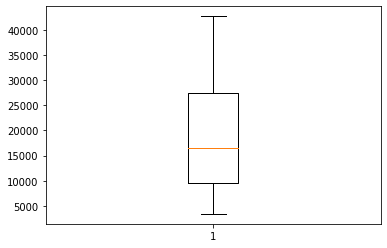

In [221]:
plt.boxplot(df.pci)

Text(0.5, 1.0, 'grpah')

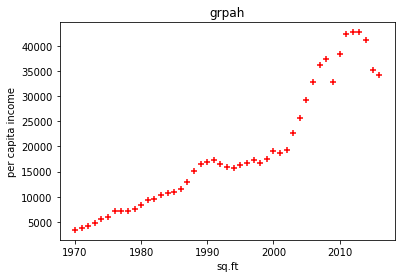

In [207]:
plt.scatter(df.year,df.pci,c='r',marker='+')
plt.xlabel('sq.ft')
plt.ylabel('per capita income')
plt.title('grpah')

In [208]:
reg=linear_model.LinearRegression()
reg.fit(df[['year']],df.pci)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [209]:
reg.coef_

array([828.46507522])

In [210]:
reg.intercept_

-1632210.7578554575

In [211]:
x=pd.DataFrame(df.year)
y=reg.coef_*x+reg.intercept_

In [212]:
df1=df['year']
df1=pd.DataFrame(df1)

In [213]:
df1.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [214]:
p=reg.predict(df1)

In [215]:
p

array([ -134.55966672,   693.9054085 ,  1522.37048373,  2350.83555895,
        3179.30063417,  4007.7657094 ,  4836.23078462,  5664.69585984,
        6493.16093506,  7321.62601029,  8150.09108551,  8978.55616073,
        9807.02123595, 10635.48631118, 11463.9513864 , 12292.41646162,
       13120.88153685, 13949.34661207, 14777.81168729, 15606.27676251,
       16434.74183774, 17263.20691296, 18091.67198818, 18920.1370634 ,
       19748.60213863, 20577.06721385, 21405.53228907, 22233.9973643 ,
       23062.46243952, 23890.92751474, 24719.39258996, 25547.85766519,
       26376.32274041, 27204.78781563, 28033.25289085, 28861.71796608,
       29690.1830413 , 30518.64811652, 31347.11319175, 32175.57826697,
       33004.04334219, 33832.50841741, 34660.97349264, 35489.43856786,
       36317.90364308, 37146.3687183 , 37974.83379353])

In [216]:
df['estimated']=p

In [224]:
df.head(3)

,year,pci,estimated
0,1970,3399.299037,-134.559667
1,1971,3768.297935,693.905409
2,1972,4251.175484,1522.370484


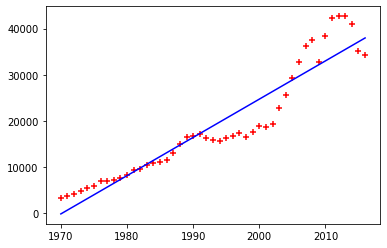

In [218]:
plt.scatter(df.year,df.pci,c='r',marker='+')
plt.plot(df.year,reg.predict(df[['year']]),color='blue')

In [219]:
from sklearn import metrics
k=np.sqrt(metrics.mean_squared_error(df.pci,df.estimated))
k

3932.268945723928

In [220]:
r2=metrics.r2_score(df.pci,df.estimated)
r2

0.890916917957032

# linear regression multiple variables


In [303]:
df=pd.read_csv(r'https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/homeprices.csv')

In [304]:
import math
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [307]:
df.bedrooms.fillna(math.floor(df.bedrooms.median()),inplace=True)

In [308]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [311]:
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [313]:
reg.predict([[2600,3,20]])

array([518217.63297611])

In [314]:
reg.coef_


array([  112.06244194, 23388.88007794, -3231.71790863])

In [315]:
reg.intercept_

221323.00186540408

In [316]:
df['estimated']=reg.predict(df[['area','bedrooms','age']])

In [317]:
df

,area,bedrooms,age,price,estimated
0,2600,3.0,20,550000,518217.632976
1,3000,4.0,15,565000,602590.079374
2,3200,4.0,18,610000,615307.414037
3,3600,3.0,30,595000,597962.895832
4,4000,5.0,8,760000,760663.426755
5,4100,6.0,8,810000,795258.551027


In [318]:
from sklearn import metrics

In [320]:
rmse=np.sqrt(metrics.mean_squared_error(df.price,df.estimated))
rmse

21125.934966871748

In [322]:
r2=metrics.r2_score(df.price,df.estimated)
r2

0.9550196399325818

In [323]:
reg.predict([[1350,2,0]])

array([419385.05864316])

# salary prediction

In [416]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv')

In [417]:
from word2number import w2n

In [418]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [419]:
df['experience'].fillna('zero',inplace=True)
df['experience1']=0

In [420]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($),experience1
0,zero,8.0,9,50000,0
1,zero,8.0,6,45000,0
2,five,6.0,7,60000,0
3,two,10.0,10,65000,0
4,seven,9.0,6,70000,0
5,three,7.0,10,62000,0
6,ten,NaN,7,72000,0
7,eleven,7.0,8,80000,0


In [421]:
for i in range(0,len(df.experience)):
    df.experience1[i]=w2n.word_to_num(df.experience[i])
df=df.drop('experience',axis=1)

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


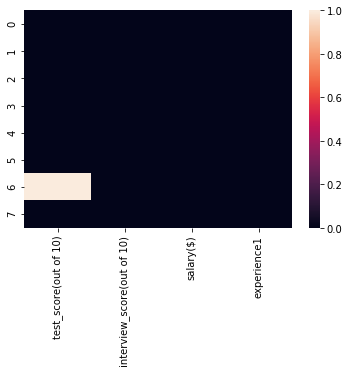

In [423]:
sns.heatmap(df.isnull())

In [424]:
df

,test_score(out of 10),interview_score(out of 10),salary($),experience1
0,8.0,9,50000,0
1,8.0,6,45000,0
2,6.0,7,60000,5
3,10.0,10,65000,2
4,9.0,6,70000,7
5,7.0,10,62000,3
6,NaN,7,72000,10
7,7.0,8,80000,11


In [425]:
df['test_score(out of 10)'].fillna(math.floor(df['test_score(out of 10)'].mean()),inplace=True)

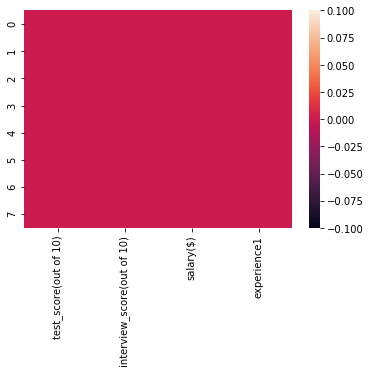

In [426]:
import seaborn as sns
sns.heatmap(df.isnull())

In [427]:
df

,test_score(out of 10),interview_score(out of 10),salary($),experience1
0,8.0,9,50000,0
1,8.0,6,45000,0
2,6.0,7,60000,5
3,10.0,10,65000,2
4,9.0,6,70000,7
5,7.0,10,62000,3
6,7.0,7,72000,10
7,7.0,8,80000,11


In [430]:
reg.fit(df[['experience1','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [431]:
df['predicted salary']=reg.predict(df[['experience1','test_score(out of 10)','interview_score(out of 10)']])

In [432]:
df

,test_score(out of 10),interview_score(out of 10),salary($),experience1,predicted salary
0,8.0,9,50000,0,52090.467341
1,8.0,6,45000,0,45648.019642
2,6.0,7,60000,5,57964.229084
3,10.0,10,65000,2,64525.106136
4,9.0,6,70000,7,68325.211846
5,7.0,10,62000,3,60783.447853
6,7.0,7,72000,10,74796.883259
7,7.0,8,80000,11,79866.634840


In [433]:
from sklearn import metrics

In [434]:
rmse=np.sqrt(metrics.mean_squared_error(df['predicted salary'],df['salary($)']))

In [435]:
rmse

1631.1471146982446

In [437]:
r2=metrics.r2_score(df['predicted salary'],df['salary($)'])
r2

0.9764731100150102

In [438]:
reg.predict([[2,9,6]])

array([53713.86677124])

In [439]:
reg.predict([[12,10,10]])

array([93747.79628651])

In [441]:
reg.predict([[50,10,10]])

array([204794.01885731])